In [155]:
import geopandas as gpd
import networkx as nx
import pandas as pd
import tempun
import matplotlib.pyplot as plt

from celluloid import Camera

from IPython.display import HTML
#result = pyreadr.read_r('/path/to/file.Rds')


In [142]:
plt.style.use('seaborn-white')
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")

/var/folders/zg/zvg9y3rs7j527jxfq9sc2xqc0000gn/T/ipykernel_88661/1576836852.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [139]:
pleiades_regions = gpd.read_file("../data/pleiades_regions.geojson", driver="GeoJSON")
pleiades_regions_merged = pleiades_regions.unary_union

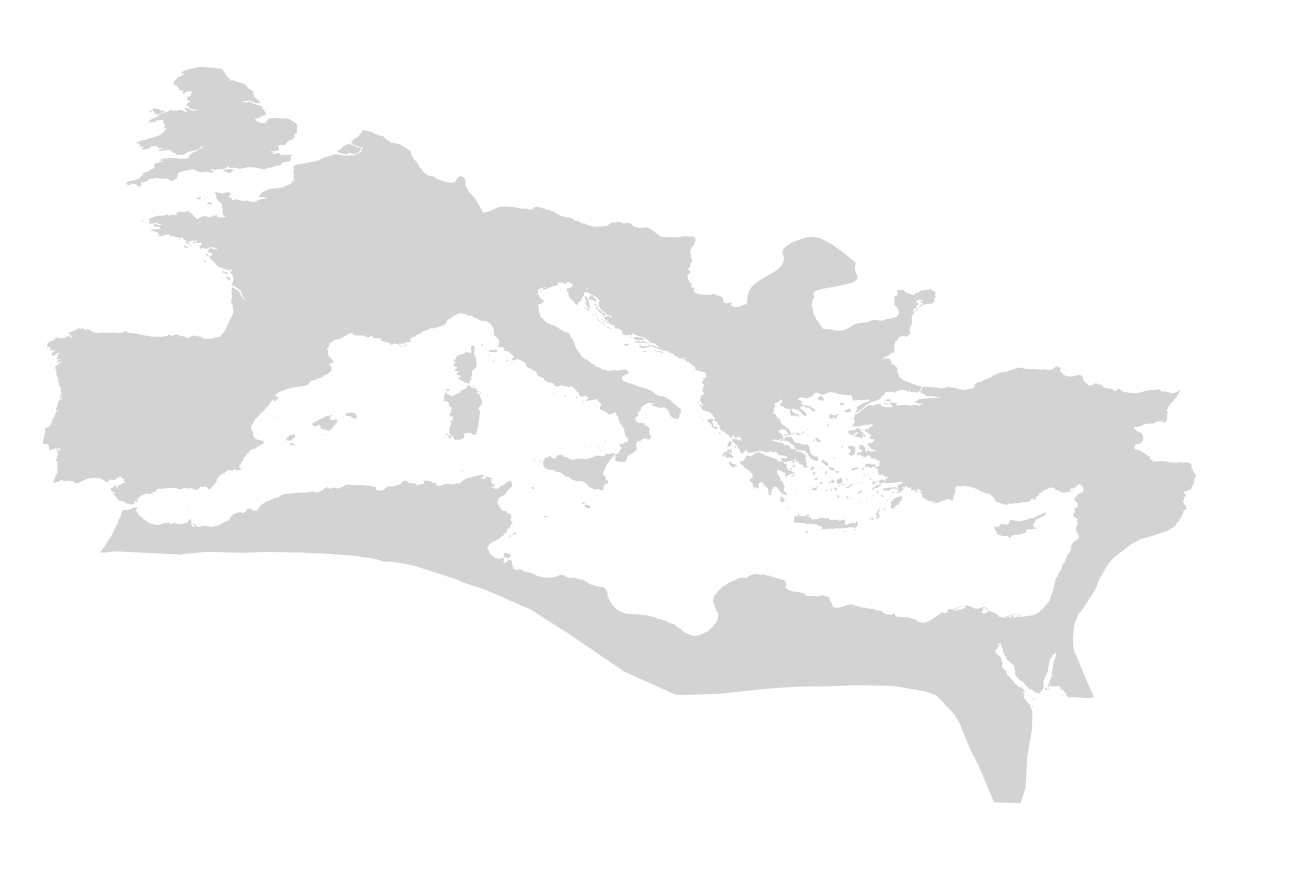

In [141]:
fig, ax = plt.subplots(figsize=(5.2, 3), dpi=300, tight_layout=True)
gpd.GeoSeries(pleiades_regions_merged).plot(ax=ax, color="lightgray")
#GIST.plot()
ax.set_xlim(-10, 45)
ax.set_axis_off()

In [17]:
origo_df = pd.read_json("../data/origo_df.json")

In [45]:
origo_geo = origo_df[origo_df["pleiades_Latitude"].notnull() & origo_df["pleiades_Longitude"].notnull()]
origo_geo

,id,hd_nr,origo,origo_clean,pleiades_id,pleiades_title_list,pleiades_Latitude,pleiades_Longitude,pleiades_title
71,HD000043/1,HD000043,Sendica (= Serdica),Serdica,207439.0,[Serdica],42.722826,23.342891,Serdica
219,HD000129/1,HD000129,Dertona,Dertona,383633.0,[Dertona],44.897171,8.865452,Dertona
220,HD000129/2,HD000129,Dertona*,Dertona,383633.0,[Dertona],44.897171,8.865452,Dertona
683,HD000358/1,HD000358,Varvaria+*,Varvaria,197574.0,[Varvaria],43.925326,15.842858,Varvaria
830,HD000423/1,HD000423,Igilgili*,Igilgili,305095.0,[Igilgili],36.820982,5.765676,Igilgili
...,...,...,...,...,...,...,...,...,...
93104,HD082148/1,HD082148,Augusta*,Augusta,648577.0,"[Augusta, Augustopolis, [Thebae]]",37.245212,35.344087,Augusta/Augustopolis/[Thebae]?
93399,HD082559/1,HD082559,Heraclea*,Heraclea,844944.0,[Heraclea],41.283255,31.417414,Heraclea
93416,HD082572/1,HD082572,Verona,Verona,383816.0,[Verona],45.442130,10.995736,Verona
93461,HD082633/1,HD082633,Tolosa*,Tolosa,246694.0,[Tolosa],43.604175,1.443246,Tolosa


In [78]:
LIST = gpd.read_parquet("../../LIRE_ETL/data/large_data/LIST_v0-3.parquet")

In [79]:
len(LIST[LIST["EDH-ID"].isin(origo_geo["hd_nr"])])

529

In [80]:
# Flying dots

In [158]:
LIST_origo = LIST[LIST["EDH-ID"].isin(origo_geo["hd_nr"])].copy()
LIST_origo["edh_point"] = LIST_origo.geometry
LIST_origo = LIST_origo[LIST_origo.geometry.is_valid]
len(LIST_origo)

527

In [159]:
LIST_origo = LIST_origo[(LIST_origo["not_before"].notnull() | LIST_origo["not_after"].notnull())]
len(LIST_origo)

524

In [160]:
LIST_origo["random_dates"] = LIST_origo.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=10, antepost=True),axis=1)
LIST_origo["random_date"] = LIST_origo["random_dates"].apply(lambda x: x[0])

In [161]:
LIST_origo

,LIST-ID,EDCS-ID,EDH-ID,trismegistos_uri,pleiades_id,transcription,inscription,clean_text_conservative,clean_text_interpretive_sentence,clean_text_interpretive_word,...,geometry,urban_context,urban_context_city,urban_context_pop_est,withinRE?,type_of_inscription_auto,type_of_inscription_auto_prob,edh_point,random_dates,random_date
445538,445539,EDCS-24900101,HD064259,https://www.trismegistos.org/text/178228,,N(umerius) &lt;G=C&gt;ranonius N(umeri) f(iliu...,N(umerius) Granonius N(umeri) f(ilius) <G=C>al...,N lt C gt ranonius N f Cal domo Luceria IIII v...,Numerius lt;G gt;ranonius Numeri filius Cal do...,Numerius lt G gt ranonius Numeri filius Cal do...,...,POINT (23.728 37.984),large,Athenae,58112.0,True,None,0.0,POINT (23.728 37.984),"[3, 3, -8, 4, -11, -1, -11, -27, -21, -29]",3
445571,445572,EDCS-11700037,HD019463,https://www.trismegistos.org/text/177113,,[---] Viruno / [--- v]ixit / [------,] Viruno / [3 v]ixit / [,Viruno ixit,Viruno vixit,Viruno vixit,...,POINT (23.728 37.984),large,Athenae,58112.0,True,epitaph,1.0,POINT (23.728 37.984),"[127, 124, 124, 122, 127, 123, 124, 125, 121, ...",127
445574,445575,EDCS-11700044,HD013721,https://www.trismegistos.org/text/177091,,C(aio) Mucio C(ai) f(ilio) Cla/udio Gemenel(l)...,G(aio!) Mucio G(ai!) f(ilio) Cla/udio Gemenelo...,C Mucio C f Claudio Gemenelo mathe tr ex class...,Caio Mucio Cai filio Claudio Gemenello mathema...,Caio Mucio Cai filio Claudio Gemenello mathema...,...,POINT (23.728 37.984),large,Athenae,58112.0,True,epitaph,1.0,POINT (23.728 37.984),"[122, 132, 92, 140, 87, 95, 148, 98, 150, 118]",122
446675,446676,EDCS-20700285,HD023339,https://www.trismegistos.org/text/244141,109008,V(ivus) f(ecit) // L(ucius) Ursius / Sosander ...,V(ivus) f(ecit) / L(ucius) Ursius / Sosander /...,V f L Ursius Sosander vestiar Bonon sibi et Ru...,Vivus fecit Lucius Ursius Sosander vestiarius ...,Vivus fecit Lucius Ursius Sosander vestiarius ...,...,POINT (1.617 50.717),rural,None,NaN,True,epitaph,1.0,POINT (1.617 50.717),"[179, 247, 172, 227, 196, 185, 249, 193, 194, ...",179
446733,446734,EDCS-09300905,HD006780,https://www.trismegistos.org/text/264182,423025,Sex(tus) Gracch[ius] / T(iti) f(ilius) Pol(lia...,Sex(tus) Gracchi[us] / T(iti) f(ilius) Pol(lia...,Sex Gracch T f Pol Fronto Faventia miles coh I...,Sextus Gracchius Titi filius Pollia Fronto Fav...,Sextus Gracchius Titi filius Pollia Fronto Fav...,...,POINT (12.486 41.892),large,Roma,923313.0,True,epitaph,1.0,POINT (12.486 41.892),"[150, 125, 140, 171, 136, 115, 188, 189, 158, ...",150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524327,524328,None,HD078033,None,109169,L(ucius) Antest[i]us / M(arci) f(ilius) Ani(en...,None,L Antestus M f Ani Tertius Cremon mil leg an L...,Lucius Antestius Marci filius Aniensis Tertius...,Lucius Antestius Marci filius Aniensis Tertius...,...,POINT (8.267 49.995),medium,Mogontiacum,19930.0,True,epitaph,1.0,POINT (8.267 49.995),"[126, 143, 139, 122, 110, 120, 137, 137, 131, ...",126
524329,524330,None,HD078035,None,109169,------](?) / [---]I(?)M(?)[---] / [---] Tolo[s...,None,IM Tolo eg I st,IM Tolosa legionis IIII stipendiorum,IM Tolosa legionis IIII stipendiorum,...,POINT (8.267 49.995),medium,Mogontiacum,19930.0,True,epitaph,1.0,POINT (8.267 49.995),"[74, 92, 96, 83, 89, 79, 100, 88, 90, 85]",74
524342,524343,None,HD078058,None,109169,[------] / Atinius / Sept&lt;i&gt;mi / f(ilius...,None,Atinius Sept lt i gt mi f Romilia Ateste mil l...,Atinius Sept lt;i gt;mi filius Romilia Ateste ...,Atinius Sept lt i gt mi filius Romilia Ateste ...,...,POINT (8.267 49.995),medium,Mogontiacum,19930.0,True,epitaph,1.0,POINT (8.267 49.995),"[76, 74, 89, 93, 92, 77, 77, 72, 75, 84]",76
524485,524486,None,HD078279,None,109169,[---]us M(arci) / [f(ilius) Le]m(onia) Bon(oni...,None,us M m Bon,us Marci filius Lemonia Bononia,us Marci filius Lemonia Bononia,...,POINT (8.267 49.995),medium,Mogontiacum,19930.0,True,epitaph,1.0,POINT (8.267 49.995),"[68, 89, 66, 75, 63, 96, 93,

In [162]:
def get_origo_geo(hd_nr):
    origo_row_1 = origo_geo.loc[origo_geo["hd_nr"]==hd_nr]
    geom = Point(origo_row_1["pleiades_Longitude"].values[0], origo_row_1["pleiades_Latitude"].values[0])
    return geom
LIST_origo["origo_point"] =  LIST_origo["EDH-ID"].apply(get_origo_geo)

In [163]:
print(LIST_origo.geometry.values[0])

POINT (23.7279843 37.9841493)


In [164]:
import geopandas as gpd
from shapely.geometry import LineString, Point, MultiPoint

<AxesSubplot: >

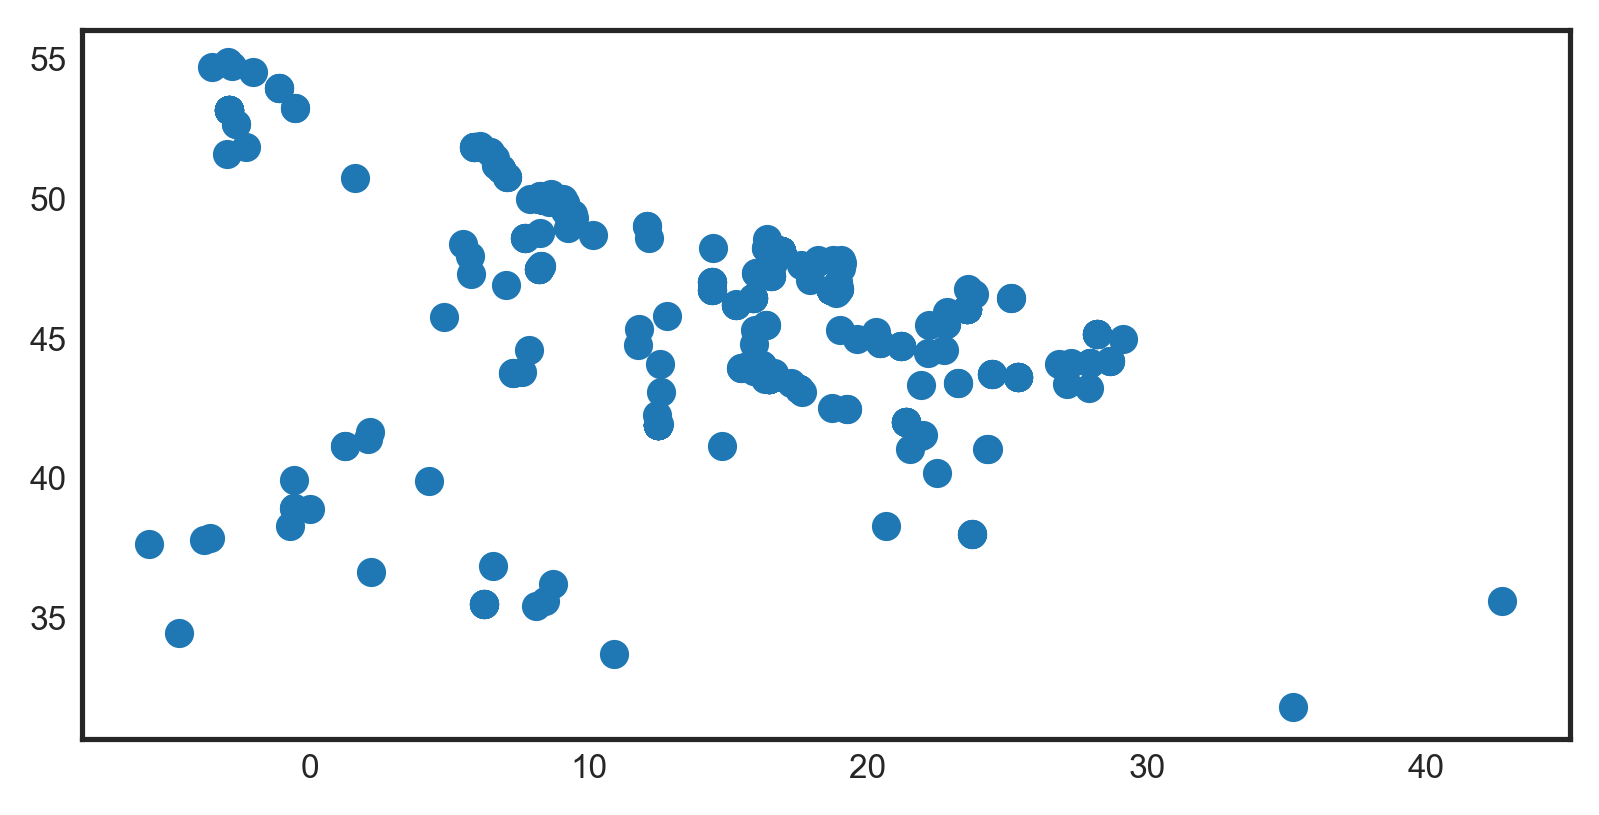

In [165]:
LIST_origo.plot()

In [166]:
LIST_origo["origo_line"] = LIST_origo.apply(lambda row: LineString([row["edh_point"], row["origo_point"]]), axis=1)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [167]:
LIST_origo

,LIST-ID,EDCS-ID,EDH-ID,trismegistos_uri,pleiades_id,transcription,inscription,clean_text_conservative,clean_text_interpretive_sentence,clean_text_interpretive_word,...,urban_context_city,urban_context_pop_est,withinRE?,type_of_inscription_auto,type_of_inscription_auto_prob,edh_point,random_dates,random_date,origo_point,origo_line
445538,445539,EDCS-24900101,HD064259,https://www.trismegistos.org/text/178228,,N(umerius) &lt;G=C&gt;ranonius N(umeri) f(iliu...,N(umerius) Granonius N(umeri) f(ilius) <G=C>al...,N lt C gt ranonius N f Cal domo Luceria IIII v...,Numerius lt;G gt;ranonius Numeri filius Cal do...,Numerius lt G gt ranonius Numeri filius Cal do...,...,Athenae,58112.0,True,None,0.0,POINT (23.728 37.984),"[3, 3, -8, 4, -11, -1, -11, -27, -21, -29]",3,POINT (15.3354745 41.5086475),"LINESTRING (23.72798 37.98415, 15.33547 41.50865)"
445571,445572,EDCS-11700037,HD019463,https://www.trismegistos.org/text/177113,,[---] Viruno / [--- v]ixit / [------,] Viruno / [3 v]ixit / [,Viruno ixit,Viruno vixit,Viruno vixit,...,Athenae,58112.0,True,epitaph,1.0,POINT (23.728 37.984),"[127, 124, 124, 122, 127, 123, 124, 125, 121, ...",127,POINT (14.3647773 46.6996149),"LINESTRING (23.72798 37.98415, 14.36478 46.69961)"
445574,445575,EDCS-11700044,HD013721,https://www.trismegistos.org/text/177091,,C(aio) Mucio C(ai) f(ilio) Cla/udio Gemenel(l)...,G(aio!) Mucio G(ai!) f(ilio) Cla/udio Gemenelo...,C Mucio C f Claudio Gemenelo mathe tr ex class...,Caio Mucio Cai filio Claudio Gemenello mathema...,Caio Mucio Cai filio Claudio Gemenello mathema...,...,Athenae,58112.0,True,epitaph,1.0,POINT (23.728 37.984),"[122, 132, 92, 140, 87, 95, 148, 98, 150, 118]",122,POINT (7.2758295 43.7194725),"LINESTRING (23.72798 37.98415, 7.27583 43.71947)"
446675,446676,EDCS-20700285,HD023339,https://www.trismegistos.org/text/244141,109008,V(ivus) f(ecit) // L(ucius) Ursius / Sosander ...,V(ivus) f(ecit) / L(ucius) Ursius / Sosander /...,V f L Ursius Sosander vestiar Bonon sibi et Ru...,Vivus fecit Lucius Ursius Sosander vestiarius ...,Vivus fecit Lucius Ursius Sosander vestiarius ...,...,None,NaN,True,epitaph,1.0,POINT (1.617 50.717),"[179, 247, 172, 227, 196, 185, 249, 193, 194, ...",179,POINT (10.026149 45.133639),"LINESTRING (1.61670 50.71670, 10.02615 45.13364)"
446733,446734,EDCS-09300905,HD006780,https://www.trismegistos.org/text/264182,423025,Sex(tus) Gracch[ius] / T(iti) f(ilius) Pol(lia...,Sex(tus) Gracchi[us] / T(iti) f(ilius) Pol(lia...,Sex Gracch T f Pol Fronto Faventia miles coh I...,Sextus Gracchius Titi filius Pollia Fronto Fav...,Sextus Gracchius Titi filius Pollia Fronto Fav...,...,Roma,923313.0,True,epitaph,1.0,POINT (12.486 41.892),"[150, 125, 140, 171, 136, 115, 188, 189, 158, ...",150,POINT (11.883507 44.286236),"LINESTRING (12.48620 41.89170, 11.88351 44.28624)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524327,524328,None,HD078033,None,109169,L(ucius) Antest[i]us / M(arci) f(ilius) Ani(en...,None,L Antestus M f Ani Tertius Cremon mil leg an L...,Lucius Antestius Marci filius Aniensis Tertius...,Lucius Antestius Marci filius Aniensis Tertius...,...,Mogontiacum,19930.0,True,epitaph,1.0,POINT (8.267 49.995),"[126, 143, 139, 122, 110, 120, 137, 137, 131, ...",126,POINT (10.026149 45.133639),"LINESTRING (8.26740 49.99510, 10.02615 45.13364)"
524329,524330,None,HD078035,None,109169,------](?) / [---]I(?)M(?)[---] / [---] Tolo[s...,None,IM Tolo eg I st,IM Tolosa legionis IIII stipendiorum,IM Tolosa legionis IIII stipendiorum,...,Mogontiacum,19930.0,True,epitaph,1.0,POINT (8.267 49.995),"[74, 92, 96, 83, 89, 79, 100, 88, 90, 85]",74,POINT (1.443246 43.604175),"LINESTRING (8.26740 49.99510, 1.44325 43.60417)"
524342,524343,None,HD078058,None,109169,[------] / Atinius / Sept&lt;i&gt;mi / f(ilius...,None,Atinius Sept lt i gt mi f Romilia Ateste mil l...,Atinius Sept lt;i gt;mi filius Romilia Ateste ...,Atinius Sept lt i gt mi filius Romilia Ateste ...,...,Mogontiacum,19930.0,True,epitaph,1.0,POINT (8.267 49.995)

<AxesSubplot: >

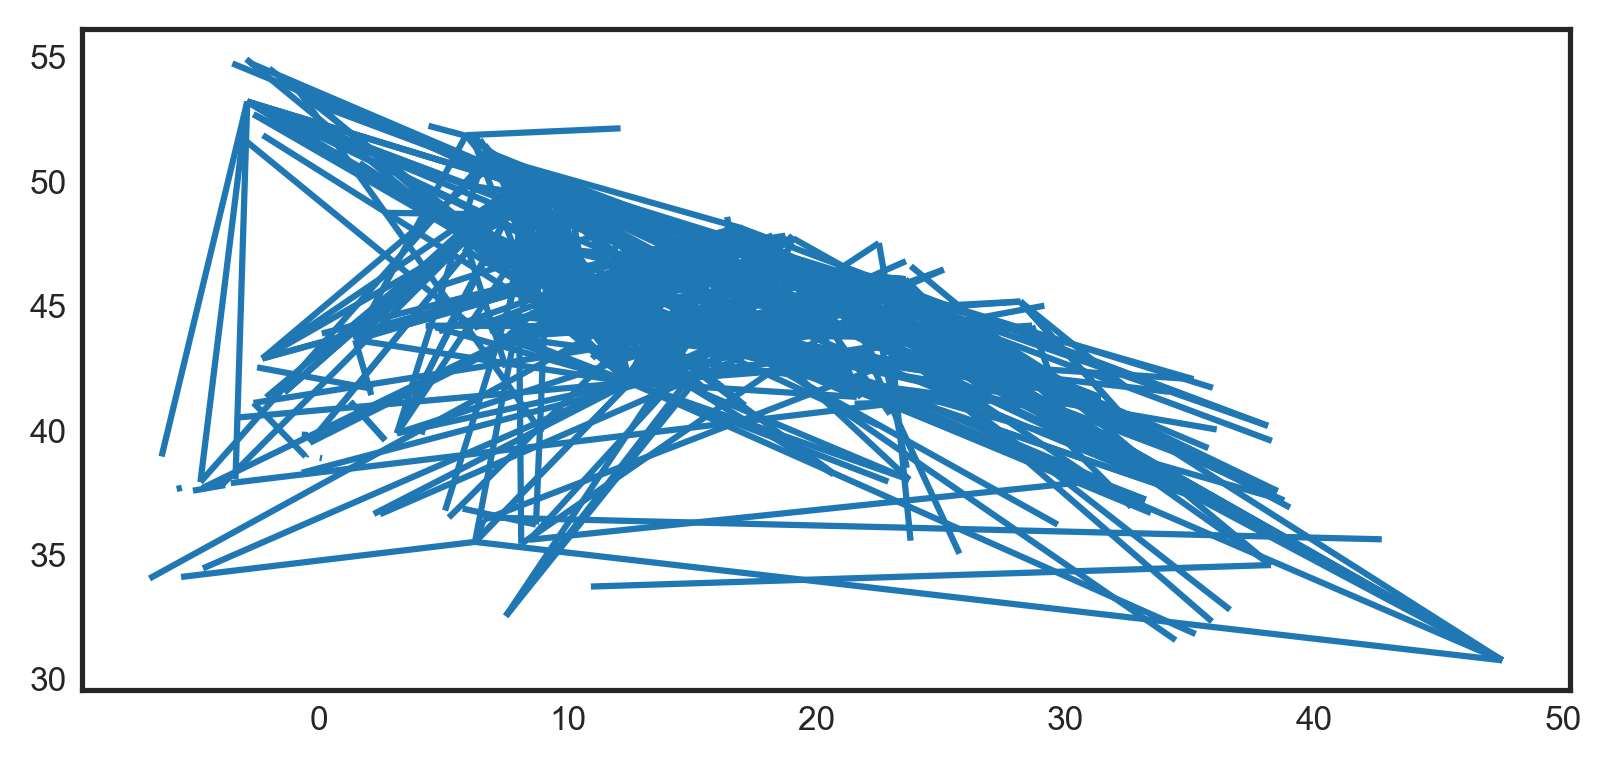

In [168]:
LIST_origo.set_geometry('origo_line').plot()

In [169]:
LIST_origo.set_geometry('origo_line', inplace=True)

# Minimal animation with lines

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been dis

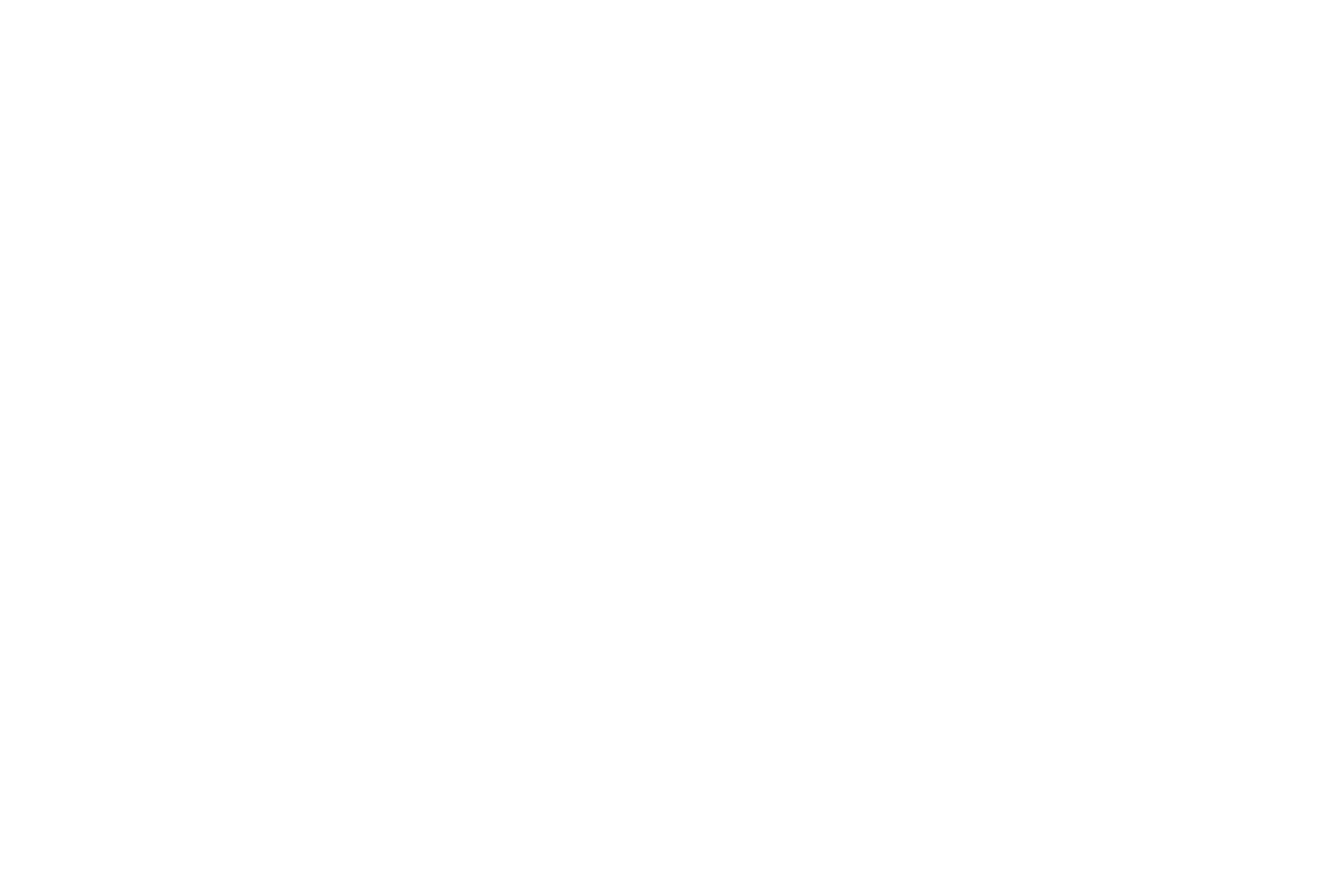

In [172]:
keep=50

fig = plt.figure(figsize=(5.2, 3), dpi=300, tight_layout=True)
ax = plt.axes()
ax.set_axis_off()
ax.set_xlim(-10,45)


camera = Camera(fig)
for year in range(-100, 400, 5):
    gpd.GeoSeries(pleiades_regions_merged).plot(ax=ax, color="lightgray")
    list_subset = LIST_origo[(LIST_origo["random_date"]<=year) & (LIST_origo["random_date"]>year-keep)]
    list_subset.plot(ax=ax)
    ax.text(30,55, str(year), fontsize=6, color="black")
    camera.snap()
animation = camera.animate()
animation.save('../data/anim1_lines.gif')

In [153]:
LIST_origo[(LIST_origo["random_date"]<=year) & (LIST_origo["random_date"]>year-keep)]

,LIST-ID,EDCS-ID,EDH-ID,trismegistos_uri,pleiades_id,transcription,inscription,clean_text_conservative,clean_text_interpretive_sentence,clean_text_interpretive_word,...,urban_context_city,urban_context_pop_est,withinRE?,type_of_inscription_auto,type_of_inscription_auto_prob,edh_point,origo_point,origo_line,random_dates,random_date
445574,445575,EDCS-11700044,HD013721,https://www.trismegistos.org/text/177091,,C(aio) Mucio C(ai) f(ilio) Cla/udio Gemenel(l)...,G(aio!) Mucio G(ai!) f(ilio) Cla/udio Gemenelo...,C Mucio C f Claudio Gemenelo mathe tr ex class...,Caio Mucio Cai filio Claudio Gemenello mathema...,Caio Mucio Cai filio Claudio Gemenello mathema...,...,Athenae,58112.0,True,epitaph,1.0,POINT (23.728 37.984),POINT (7.2758295 43.7194725),"LINESTRING (23.72798 37.98415, 7.27583 43.71947)","[95, 124, 158, 89, 91, 124, 109, 143, 102, 102]",95
446876,446877,EDCS-14000201,HD015051,https://www.trismegistos.org/text/244338,,Imp(erator) Caesar divi Nervae f(ilius) Nerva ...,Imp(erator) Caesar divi Nervae f(ilius) Nerva ...,Imp Caesar divi Nervae f Nerva Traianus August...,Imperator Caesar divi Nervae filius Nerva Trai...,Imperator Caesar divi Nervae filius Nerva Trai...,...,None,NaN,True,military diploma,1.0,POINT (11.750 44.768),POINT (16.7963964392 43.6860909288),"LINESTRING (11.74981 44.76764, 16.79640 43.68609)","[100, 100, 100, 100, 100, 100, 100, 100, 100, ...",100
450954,450955,EDCS-13000608,HD031129,https://www.trismegistos.org/text/201005,324831,Iovi Au[g(usto) s(acrum)] / dedic[ante] / Cn(a...,Iovi Au[g(usto) s(acrum)] / dedic[ante] / Cn(a...,Iovi Au dedic Cn Suellio Fl leg Aug pro p Q Ma...,Iovi Augusto sacrum dedicante Cnaeo Suellio Fl...,Iovi Augusto sacrum dedicante Cnaeo Suellio Fl...,...,Theveste,11517.0,True,votive inscription,1.0,POINT (8.121 35.407),POINT (8.035244 44.700835),"LINESTRING (8.12080 35.40710, 8.03524 44.70083)","[87, 87, 88, 87, 87, 87, 88, 88, 87, 88]",87
460848,460849,EDCS-07800763,HD069753,https://www.trismegistos.org/text/154973,79420,L(ucius) Valerius / L(uci) f(ilius) Claudia / ...,L(ucius) Valerius / L(uci) f(ilius) Claudia / ...,L Valerius L f Claudia Seneca Savar es leg II ad,Lucius Valerius Luci filius Claudia Seneca Sav...,Lucius Valerius Luci filius Claudia Seneca Sav...,...,None,NaN,True,epitaph,1.0,POINT (-2.895 53.185),POINT (16.62192 47.235142),"LINESTRING (-2.89520 53.18550, 16.62192 47.23514)","[89, 87, 90, 89, 89, 88, 89, 89, 88, 85]",89
460850,460851,EDCS-07800765,HD069755,https://www.trismegistos.org/text/154975,79420,[Voltim]/esis Pudens G(ai) fil(ius) / Ser(gia)...,Voltim]/esis(?) Pudens C(ai) fil(ius) / Ser(gi...,esis Pudens G fil Ser Augusta eques leg II ad ...,Voltimesis Pudens Gai filius Sergia Augusta eq...,Voltimesis Pudens Gai filius Sergia Augusta eq...,...,None,NaN,True,epitaph,1.0,POINT (-2.895 53.185),POINT (35.344087 37.245212),"LINESTRING (-2.89520 53.18550, 35.34409 37.24521)","[83, 83, 83, 83, 83, 83, 83, 83, 83, 83]",83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523922,523923,None,HD077334,None,109169,C(aius) Valeri/us C(ai) f(ilius) Cla(udia) / [...,None,C Valerius C f Cla udes Sava mil leg II adiu a...,Caius Valerius Cai filius Claudia Pudens Savar...,Caius Valerius Cai filius Claudia Pudens Savar...,...,Mogontiacum,19930.0,True,epitaph,1.0,POINT (8.267 49.995),POINT (16.62192 47.235142),"LINESTRING (8.26740 49.99510, 16.62192 47.23514)","[93, 90, 99, 93, 86, 87, 96, 89, 94, 88]",93
523940,523941,None,HD077440,None,109169,------] / Po(l)lia Va/lentia mi/le(s) leg(ioni...,None,Polia Valentia mile leg IIII Mac an XXV stip V...,Pollia Valentia miles legionis IIII Macedonica...,Pollia Valentia miles legionis IIII Macedonica...,...,Mogontiacum,19930.0,True,epitaph,1.0,POINT (8.267 49.995),POINT (-0.376813 39.470371),"LINESTRING (8.26740 49.99510, -0.37681 39.47037)","[74, 85, 99, 76, 85, 93, 94, 83, 73, 97]",74
524329,524330,None,HD078035,None,109169,------](?) / [---]I(?)M(?)[---] / [---] Tolo[s...,None,IM Tolo eg I st,

# Lines into points

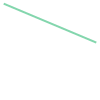

In [127]:
line = LIST_origo["origo_line"].values[0] #should work also with paths, not only direct lines
line

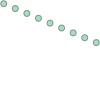

In [126]:
MultiPoint([line.interpolate((i/10), normalized=True) for i in range(1, 10)])

In [36]:
hd_nr = "HD036062"

In [41]:
def get_hd_geom(hd_nr):
    geom = LIST.loc[LIST["EDH-ID"]==hd_nr].geometry
    return geom
origo_geo["hd_point"] =  origo_geo["hd_nr"].apply(

In [ ]:

origo_geo["hd_point"] =  origo_geo["hd_nr"].apply(

In [33]:
gpd.GeoDataFrame(origo_geo, crs="epsg:4326")

ValueError: Assigning CRS to a GeoDataFrame without a geometry column is not supported. Supply geometry using the 'geometry=' keyword argument, or by providing a DataFrame with column name 'geometry'

# On Orbis network

In [10]:
G = nx.read_graphml("../data/orbis_network_enriched.graphml")

In [11]:
G.edges(data=True)

EdgeDataView([('50001', '50056', {'km': 54.539, 'expense_inverse': 0.5238344683080146, 'expense': 1.909, 'days': 1.818, 'route_type': 'road/road', 'gravity': 274.4025501875404, 'gravity_inverse': 0.0036442810000000005}), ('50001', '50100', {'km': 50.135, 'expense_inverse': 0.5698005698005698, 'expense': 1.755, 'days': 1.671, 'route_type': 'road/road', 'gravity': 324.67268934505404, 'gravity_inverse': 0.0030800249999999997}), ('50001', '50293', {'km': 65.681, 'expense_inverse': 0.43497172683775553, 'expense': 2.299, 'days': 2.189, 'route_type': 'road/road', 'gravity': 189.20040314821904, 'gravity_inverse': 0.0052854009999999995}), ('50001', '50473', {'km': 225.368, 'expense_inverse': 0.12677484787018256, 'expense': 7.888, 'days': 7.512, 'route_type': 'road/road', 'gravity': 16.07186205250793, 'gravity_inverse': 0.062220543999999996}), ('50056', '50314', {'km': 126.177, 'expense_inverse': 0.22644927536231882, 'expense': 4.416, 'days': 4.206, 'route_type': 'road/road', 'gravity': 543.9705

# Adela's data

In [6]:
orig_dest155 = gpd.read_file("../data/orig_dest155.geojson", driver="GeoJSON")

<AxesSubplot: >

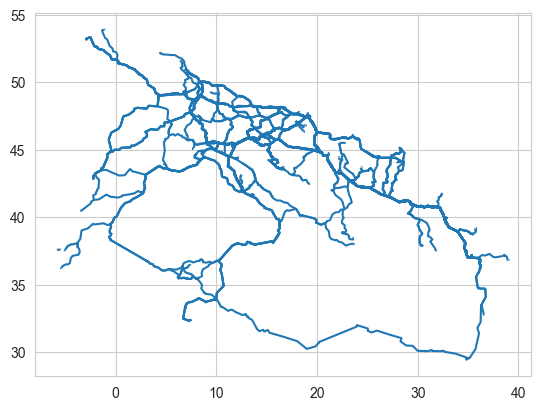

In [7]:
orig_dest155.plot()

In [8]:
# - start with simple space-abstracted animation of dots moving from origo to destintion
# - in a next step, we will move it to Orbis
